In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random
from IPython import display


In [2]:
class Particle():
    def __init__(self, x, y, v_x, v_y,cost):
        self.bestCost_x = x
        self.bestCost_y = y
        self.bestpersonalcost = cost
        self.x = x
        self.y = y
        self.v_x = v_x
        self.v_y = v_y
        self.r_nei = None
        self.l_nei = None

In [24]:
class Optimizer():
    def __init__(self, function, numberOfParticles, w, c1, c2, rangee, optima,gif_n, max_v=5):
        self.optima = optima
        self.n = numberOfParticles
        self.w = w
        self.c1 = c1
        self.c2 = c2
        self.particles = []
        self.rangee = rangee
        self.function = function
        self.max_v = max_v
        self.globalCost_x = 0.1
        self.globalCost_y = 0
        self.max_v = max_v
        self.history =[]
        self.bestglobalcost = self.function(self.globalCost_x ,self.globalCost_y)
        self.gif_n = gif_n    
        
    def move_particle(self,particle):
        if (particle.x + particle.v_x <= self.rangee) and (particle.x + particle.v_x >= -self.rangee):
            particle.x += particle.v_x
        else:
            if particle.x > 0:
                particle.x = self.rangee
            else:
                particle.x = -self.rangee

        if (particle.y + particle.v_y <= self.rangee) and (particle.y + particle.v_y >= -self.rangee):
            particle.y += particle.v_y
        else:
            if particle.y > 0:
                particle.y = self.rangee
            else:
                particle.y = -self.rangee
            
        r1 = random.uniform(0, 2);
        r2 = random.uniform(0, 2);
#         if particle.v_x < self.max_v and particle.v_x > self.max_v:
        particle.v_x = (particle.v_x * self.w) + ((particle.bestCost_x-particle.x) * self.c1 * r1) + ((self.globalCost_x-particle.x) * self.c2 * r2)
#         else:
#             particle.v_x *= self.w
        
#         if particle.v_y < self.max_v and particle.v_y > self.max_v:
        particle.v_y = (particle.v_y * self.w) + ((particle.bestCost_y-particle.y) * self.c1 * r1) + ((self.globalCost_y-particle.y) * self.c2 * r2)
#         else:
#             particle.v_y *= self.w
        
    def init_particles(self):
        for i in range(self.n):
            x = (random.random()-0.5) * 2 * self.rangee
            y = (random.random()-0.5) * 2 * self.rangee
            v_x = random.random() * self.max_v
            v_y = random.random() * self.max_v
            
            cost = self.function(x,y)
            p = Particle(x, y, v_x, v_y,cost)
            self.particles.append(p)
            
    def updateBests(self, p):
        cost = self.function(p.x,p.y)
        
        
        if self.optima == 'max':
            if cost > p.bestpersonalcost:
                p.bestCost_x = p.x
                p.bestCost_y = p.y
                p.bestpersonalcost = cost
                
            if cost > self.bestglobalcost:
                self.globalCost_x = p.x
                self.glovalCost_y = p.y
                self.bestglobalcost = cost
                
        elif self.optima == 'min':
            if cost < p.bestpersonalcost:
                p.bestCost_x = p.x
                p.bestCost_y = p.y
                p.bestpersonalcost = cost

            if cost < self.bestglobalcost:
                self.globalCost_x = p.x
                self.glovalCost_y = p.y
                self.bestglobalcost = cost

    def train(self,itteration=500):
        self.init_particles()
        self.itteration = itteration
        for itter in range(itteration):
            itter_his = []
#             print(self.bestglobalcost)
            for p in self.particles:
                self.updateBests(p)
                self.move_particle(p)
                tempp = [p.x, p.y]
                itter_his.append(tempp)
            self.history.append(itter_his)
        
        return self.bestglobalcost
    def fitness(self,p):
        x = p.x
        y = p.y
        return self.function(x,y)
    
    def findbest(self):
        for itter in self.history:
            for x,y in itter:
                cost = self.function(x,y)
                if cost == self.bestglobalcost:
                    xx,yy = x,y
        return xx,yy
    
    def visualization(self):
        fig, ax = plt.subplots(figsize=(8,6))
        ax.set_xlim([-self.rangee,self.rangee])
        ax.set_ylim([-self.rangee,self.rangee])
        ax.set_xlabel(0)

        X = []
        Y = []
        hist = self.history[0]
        for i in hist:
            X.append(i[0])
            Y.append(i[1])

        ax.scatter(X, Y, marker="o")

        def animate(itter):
            label = 'timestep {0}'.format(itter)
            ax.set_xlabel(label)
            ax.set_xlim([-self.rangee,self.rangee])
            ax.set_ylim([-self.rangee,self.rangee])
            X = []
            Y = []
            hist = self.history[itter]
            for i in hist:
                X.append(i[0])
                Y.append(i[1])
            ax.clear()
            ax.scatter(X, Y, marker="o")


        n = self.n
        anim = FuncAnimation(fig, animate, frames=list(range(1,self.itteration)), interval=500, blit=False, repeat=True)
        anim.save("PSO{}.gif".format(self.gif_n),dpi=120, writer="imagemagick")
        
        


In [17]:
def f(x,y):
    tmp = math.exp(abs(1-((math.sqrt((x**2 + y**2)))/math.pi)))
    return abs(math.sin(x) * math.cos(y) * tmp)
    
def g(x,y):
    temp = x * math.sin(math.pi * math.cos(x) * math.tan(y))
    temp *= (math.sin(y/x) / (1+math.cos(y/x)))
    return temp

In [280]:
solution = Optimizer(function=f, numberOfParticles=1000, w=0.8, c1=0.1, c2=0.1, 
                     rangee=10,optima='max', max_v=5)
solution.train(50)

19.20735850679176

In [22]:
f(8.063696601615975,9.67079655682449)

19.20735850679176

MovieWriter imagemagick unavailable; using Pillow instead.


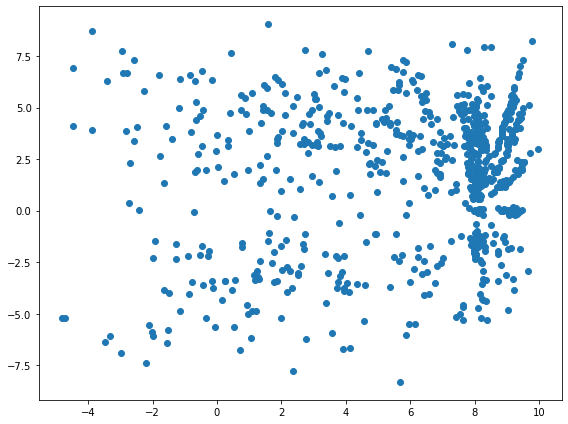

In [341]:
solution.visualization()

MovieWriter imagemagick unavailable; using Pillow instead.


-11271103.34685171


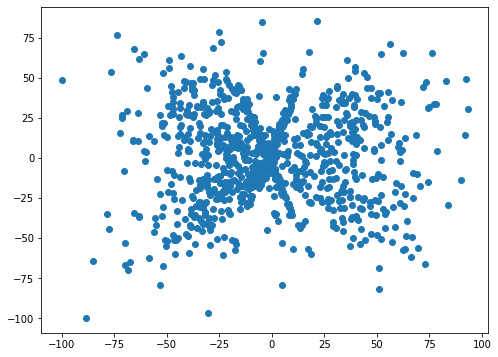

In [15]:
solution2 = Optimizer(function=g, numberOfParticles=1000, w=0.8 ,c1=0.2, c2=0.1, 
                     rangee=100,optima='min',gif_n=3, max_v=5)
print(solution2.train(5000))
solution2.visualization()

In [19]:
print(solution2.findbest())

(-25.621495693364295, -80.49223412253795)

MovieWriter imagemagick unavailable; using Pillow instead.


19.19443742253997


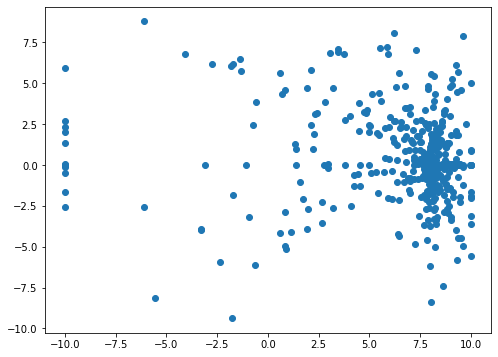

In [25]:
solution1 = Optimizer(function=f, numberOfParticles=1000, w=0.5, c1=0.3, c2=0.85, 
                     rangee=10,optima='max', gif_n=1, max_v=5)
print(solution1.train(50))
solution1.visualization()